# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

El problema es identificar los factores clave que influyen en el precio de los autos usados, lo que permitirá al concesionario optimizar su inventario y sus estrategias de precios. Para reformular esta tarea como un problema de datos, nuestro objetivo es predecir el precio de un auto usado en función de diversas características, incluyendo la edad del vehículo, el fabricante, el kilometraje, el tipo de combustible, la condición y otros atributos relevantes.

En términos técnicos, esta tarea es un problema de regresión, donde la variable objetivo es el precio del auto, y las características (o predictores) incluyen atributos numéricos y categóricos como el kilometraje, el modelo del auto, el tamaño del motor y el tipo de combustible. Nuestro objetivo es construir un modelo predictivo que pueda estimar los precios de los autos en función de estas características, identificar qué factores tienen el impacto más significativo en el precio y proporcionar información accionable para el concesionario.

Al usar modelos de regresión, seremos capaces de entender la relación entre cada característica y el precio, y proporcionar recomendaciones al concesionario sobre qué aspectos de un auto son más valorados por los consumidores.

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

En esta sección, exploraremos el conjunto de datos para obtener información sobre su estructura e identificar cualquier paso de preprocesamiento necesario. Revisaremos las columnas, los valores faltantes y realizaremos un análisis exploratorio de datos (EDA) básico.

El conjunto de datos contiene las siguientes columnas:

id: Identificador único para cada vehículo.
region: La región donde se encuentra el vehículo.
price: Precio del vehículo.
year: Año en que se fabricó el vehículo.
manufacturer: Fabricante del vehículo.
model: Modelo del vehículo.
condition: Condición del vehículo.
cylinders: Número de cilindros del motor.
fuel: Tipo de combustible que utiliza el vehículo.
odometer: Kilometraje en el odómetro del vehículo.
title_status: Estado del título del vehículo.
transmission: Tipo de transmisión (automática, manual).
VIN: Número de Identificación del Vehículo (Vehicle Identification Number).
drive: Tipo de tracción (FWD, 4WD).
size: Tamaño del vehículo.
type: Tipo de vehículo (por ejemplo, sedán, SUV).
paint_color: Color del vehículo.
state: El estado donde se encuentra el vehículo.

Primero revisaremos los valores faltantes y las estadísticas básicas de las columnas.

In [1]:
import pandas as pd

# Load the dataset
vehicles_df = pd.read_csv('data/vehicles.csv')

# Preview the dataset
vehicles_df.head()
    

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [2]:
# Check for missing values
vehicles_df.isnull().sum()

id                   0
region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64

In [3]:
# Get basic statistics for numerical columns
vehicles_df.describe()

,id,price,year,odometer
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07


### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

Limpiaremos el conjunto de datos manejando los valores faltantes y eliminando las columnas innecesarias. Los pasos clave incluyen:

Eliminar las filas con la variable objetivo faltante (price).
Manejar los valores faltantes en otras columnas clave (por ejemplo, year, manufacturer, odometer).
Codificar las variables categóricas como manufacturer, fuel, transmission, y drive.

In [4]:

# Dropping irrelevant columns
vehicles_df_cleaned = vehicles_df.drop(columns=['id', 'VIN'])

# Handle missing values
vehicles_df_cleaned = vehicles_df_cleaned[vehicles_df_cleaned['price'].notna() & (vehicles_df_cleaned['price'] > 0)]
vehicles_df_cleaned['year'].fillna(vehicles_df_cleaned['year'].median(), inplace=True)
vehicles_df_cleaned['odometer'].fillna(vehicles_df_cleaned['odometer'].median(), inplace=True)

# For categorical columns, fill missing values with mode
categorical_columns = ['manufacturer', 'fuel', 'transmission', 'drive', 'paint_color', 'title_status', 'type', 'condition']
for col in categorical_columns:
    vehicles_df_cleaned[col].fillna(vehicles_df_cleaned[col].mode()[0], inplace=True)

# Remove outliers in price
vehicles_df_cleaned = vehicles_df_cleaned[vehicles_df_cleaned['price'] <= 200000]

# One-hot encode categorical variables
X = vehicles_df_cleaned.drop(columns=['price', 'model', 'cylinders', 'size'])
X = pd.get_dummies(X, drop_first=True)
y = vehicles_df_cleaned['price']

In [5]:
vehicles_df_cleaned

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
0,prescott,6000,2013.0,ford,NaN,good,NaN,gas,87000.0,clean,automatic,4wd,NaN,sedan,white,az
1,fayetteville,11900,2013.0,ford,NaN,good,NaN,gas,87000.0,clean,automatic,4wd,NaN,sedan,white,ar
2,florida keys,21000,2013.0,ford,NaN,good,NaN,gas,87000.0,clean,automatic,4wd,NaN,sedan,white,fl
3,worcester / central MA,1500,2013.0,ford,NaN,good,NaN,gas,87000.0,clean,automatic,4wd,NaN,sedan,white,ma
4,greensboro,4900,2013.0,ford,NaN,good,NaN,gas,87000.0,clean,automatic,4wd,NaN,sedan,white,nc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,wyoming,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,fwd,NaN,sedan,white,wy
426876,wyoming,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,gas,12029.0,clean,other,fwd,NaN,sedan,red,wy
426877,wyoming,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,diesel,4174.0,clean,other,4wd,NaN,hatchback,white,wy
426878,wyoming,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,fwd,NaN,sedan,silver,wy


#### Visualization

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


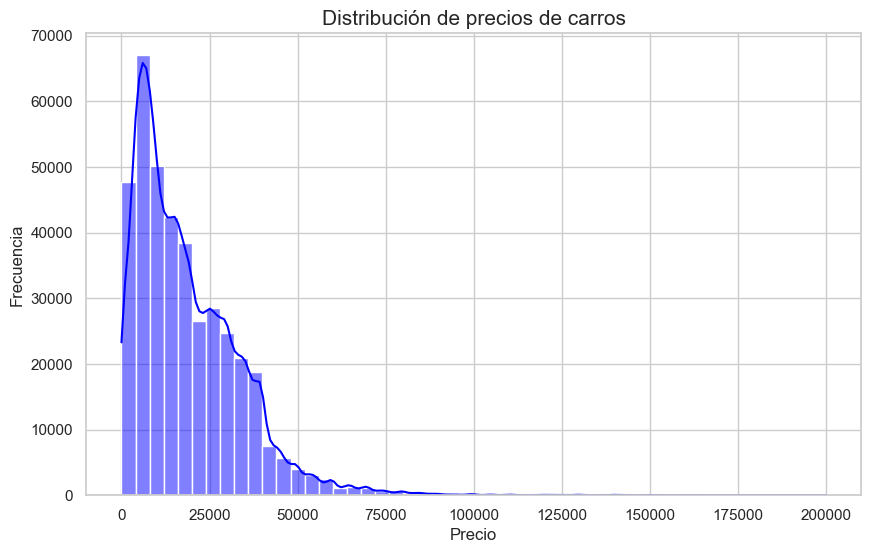

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


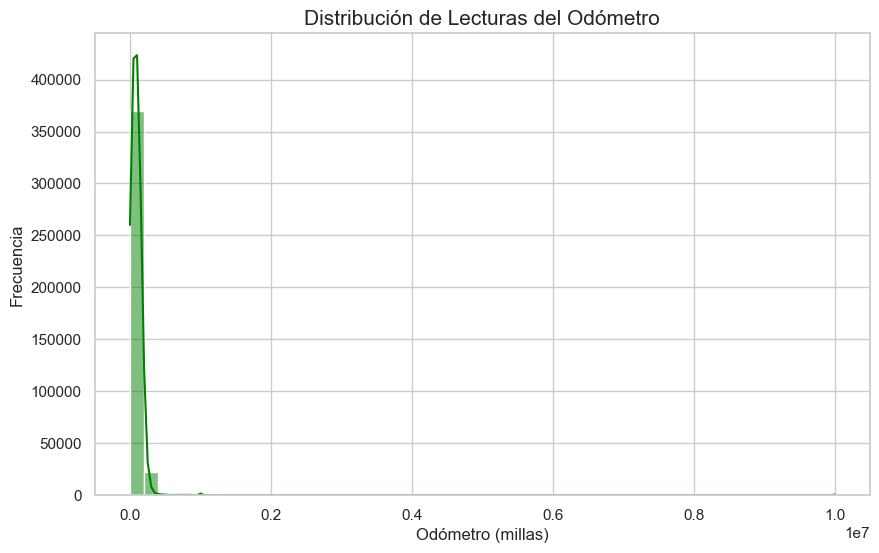

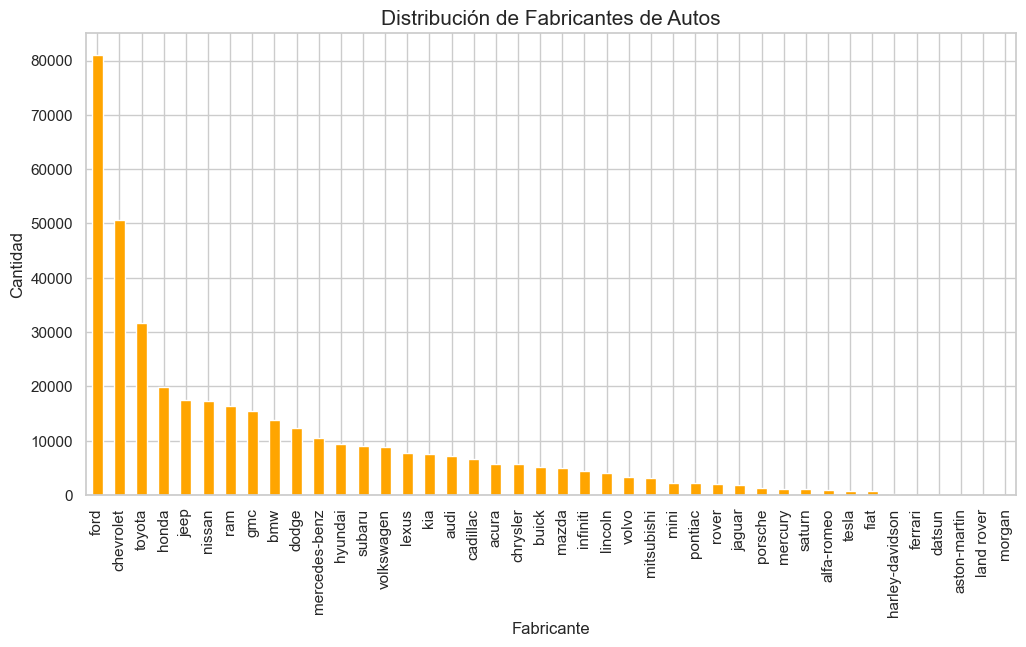

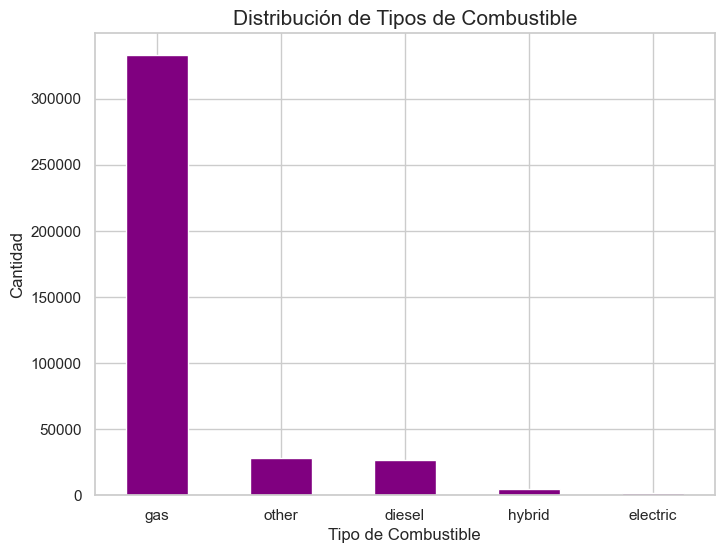

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style for readability
sns.set(style="whitegrid")

# 1. Distribución de precios de carros
plt.figure(figsize=(10,6))
sns.histplot(vehicles_df_cleaned['price'], bins=50, kde=True, color='blue')
plt.title('Distribución de precios de carros', fontsize=15)
plt.xlabel('Precio', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.show()

# 2. Distribución de Lecturas del Odómetro
plt.figure(figsize=(10,6))
sns.histplot(vehicles_df_cleaned['odometer'], bins=50, kde=True, color='green')
plt.title('Distribución de Lecturas del Odómetro', fontsize=15)
plt.xlabel('Odómetro (millas)', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.show()

# 3. Gráfico de Barras para la Distribución de Fabricantes
plt.figure(figsize=(12,6))
vehicles_df_cleaned['manufacturer'].value_counts().plot(kind='bar', color='orange')
plt.title('Distribución de Fabricantes de Autos', fontsize=15)
plt.xlabel('Fabricante', fontsize=12)
plt.ylabel('Cantidad', fontsize=12)
plt.xticks(rotation=90)
plt.show()

# 4. Gráfico de Barras para la Distribución de Tipos de Combustible
plt.figure(figsize=(8,6))
vehicles_df_cleaned['fuel'].value_counts().plot(kind='bar', color='purple')
plt.title('Distribución de Tipos de Combustible', fontsize=15)
plt.xlabel('Tipo de Combustible', fontsize=12)
plt.ylabel('Cantidad', fontsize=12)
plt.xticks(rotation=0)
plt.show()

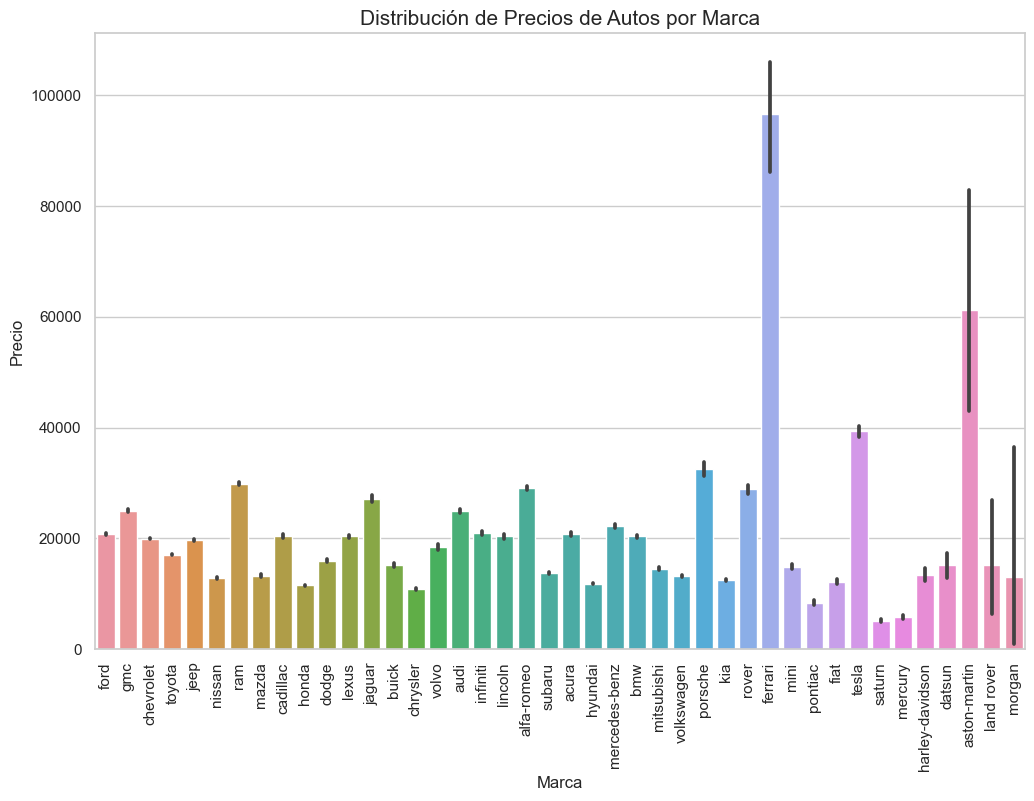

In [7]:
# Gráfico barplot para los precios por marca
plt.figure(figsize=(12,8))
sns.barplot(x='manufacturer', y='price', data=vehicles_df_cleaned)
plt.title('Distribución de Precios de Autos por Marca', fontsize=15)
plt.xlabel('Marca', fontsize=12)
plt.ylabel('Precio', fontsize=12)
plt.xticks(rotation=90)  # Rotar los nombres de las marcas para mayor legibilidad
plt.show()


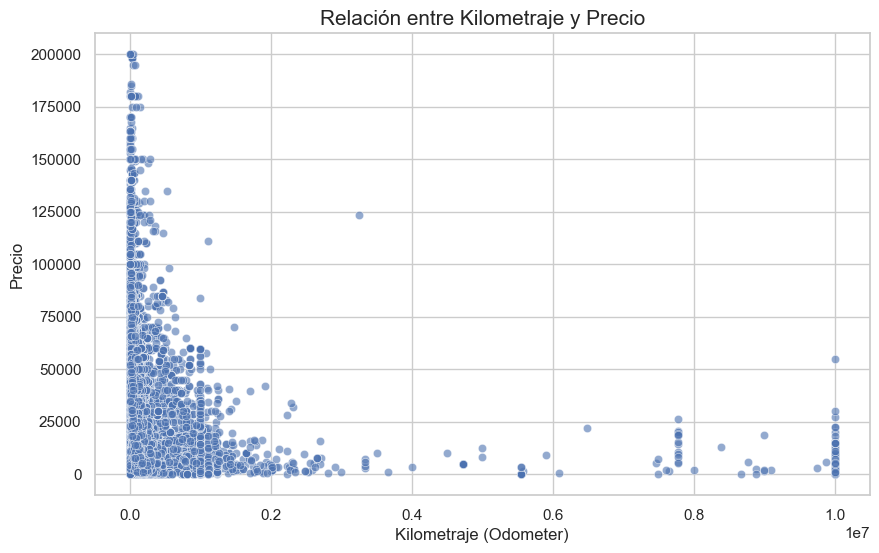

In [8]:
# Gráfico scatterplot Relación entre Kilometraje y Precio
plt.figure(figsize=(10,6))
sns.scatterplot(x='odometer', y='price', data=vehicles_df_cleaned, alpha=0.6)
plt.title('Relación entre Kilometraje y Precio', fontsize=15)
plt.xlabel('Kilometraje (Odometer)', fontsize=12)
plt.ylabel('Precio', fontsize=12)
plt.show()

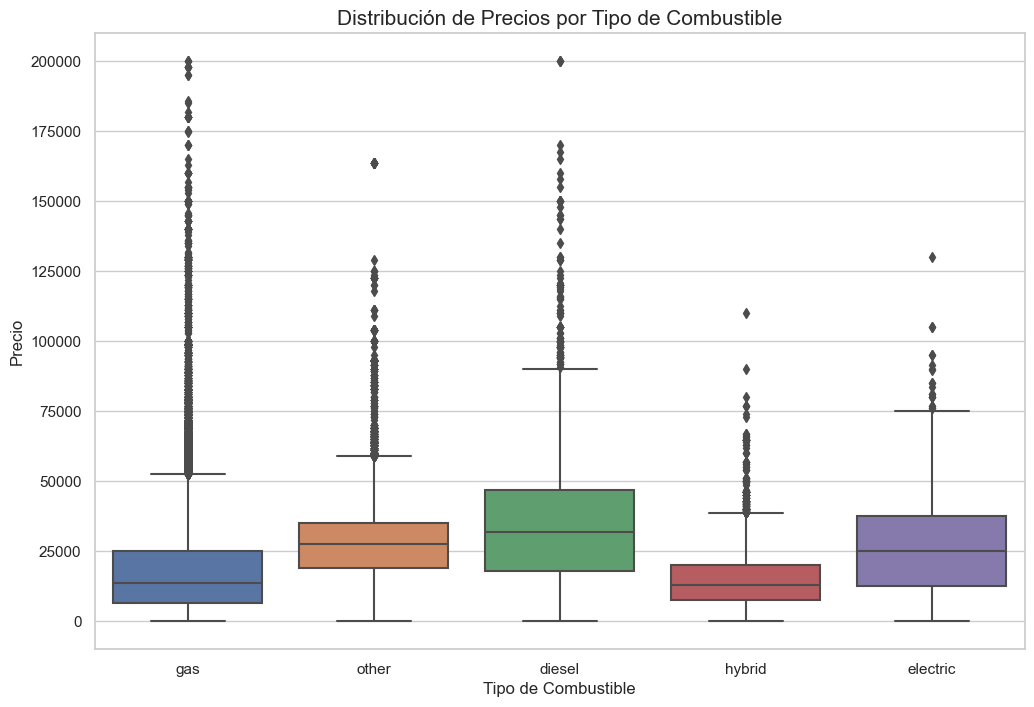

In [9]:
# Gráfico de caja (boxplot)  Distribución de Precios por Tipo de Combustible
plt.figure(figsize=(12,8))
sns.boxplot(x='fuel', y='price', data=vehicles_df_cleaned)
plt.title('Distribución de Precios por Tipo de Combustible', fontsize=15)
plt.xlabel('Tipo de Combustible', fontsize=12)
plt.ylabel('Precio', fontsize=12)
plt.show()

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


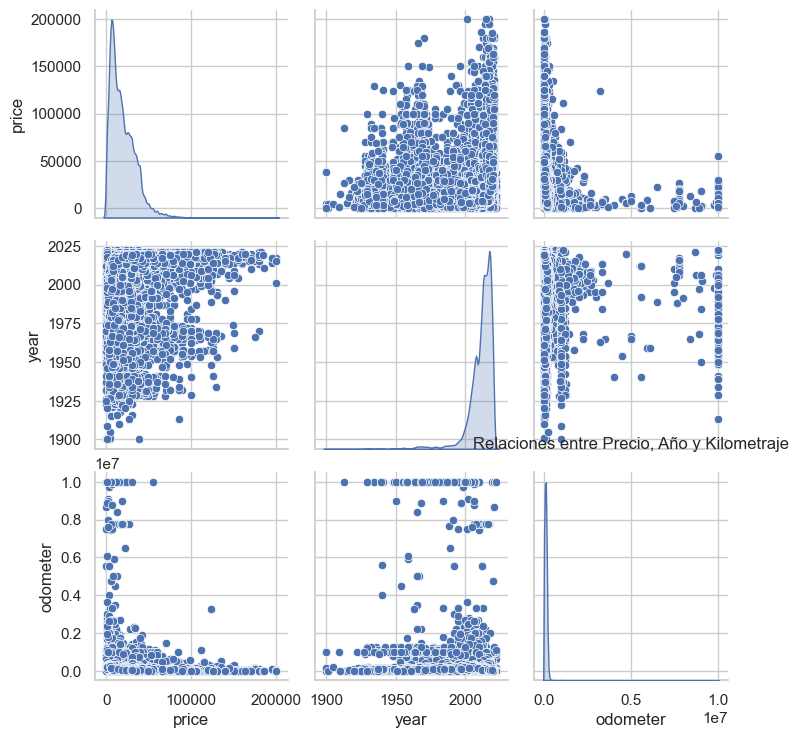

In [10]:
# Gráfico pairplot Relaciones entre Precio, Año y Kilometraje
sns.pairplot(vehicles_df_cleaned, vars=['price', 'year', 'odometer'], diag_kind='kde')
plt.title('Relaciones entre Precio, Año y Kilometraje')
plt.show()

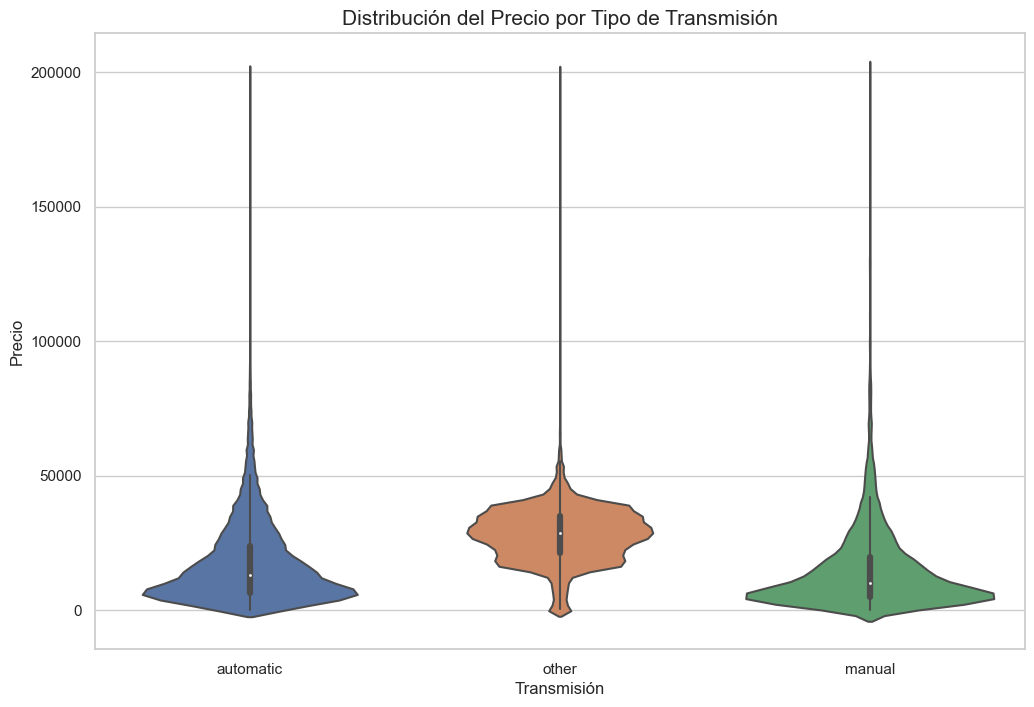

In [11]:
# Gráfico violinplot Distribución del Precio por Tipo de Transmisión
plt.figure(figsize=(12,8))
sns.violinplot(x='transmission', y='price', data=vehicles_df_cleaned)
plt.title('Distribución del Precio por Tipo de Transmisión', fontsize=15)
plt.xlabel('Transmisión', fontsize=12)
plt.ylabel('Precio', fontsize=12)
plt.show()

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.


Construiremos varios modelos de regresión (Lineal, Ridge, Lasso) y ajustaremos los hiperparámetros utilizando validación cruzada.

In [12]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [13]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
X_train

,year,odometer,region_abilene,region_akron / canton,region_albany,region_albuquerque,region_altoona-johnstown,region_amarillo,region_ames,region_anchorage / mat-su,...,state_sd,state_tn,state_tx,state_ut,state_va,state_vt,state_wa,state_wi,state_wv,state_wy
101647,2017.0,63281.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
221583,2012.0,69991.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
260245,2009.0,128961.0,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8959,2008.0,72290.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
409662,2014.0,63186.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279385,2014.0,105000.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
396705,2016.0,94000.0,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
142858,2016.0,17302.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
158566,2015.0,77745.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [15]:
X_test

,year,odometer,region_abilene,region_akron / canton,region_albany,region_albuquerque,region_altoona-johnstown,region_amarillo,region_ames,region_anchorage / mat-su,...,state_sd,state_tn,state_tx,state_ut,state_va,state_vt,state_wa,state_wi,state_wv,state_wy
423572,2018.0,27200.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
213002,2020.0,37610.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
420038,2018.0,53566.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
144882,2020.0,10392.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
213819,2012.0,181653.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331157,2019.0,21246.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
225162,2017.0,73000.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
87168,2010.0,143753.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
256127,2006.0,125000.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [16]:
y_test

423572    36590
213002    35000
420038    39998
144882    71995
213819     9500
          ...  
331157    30590
225162    65999
87168     16995
256127     3695
343223    46590
Name: price, Length: 78773, dtype: int64

In [17]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [18]:
X_train_scaled

array([[ 0.62395541, -0.17051662, -0.02330237, ..., -0.1714347 ,
        -0.05076747, -0.03811161],
       [ 0.10366149, -0.1383611 , -0.02330237, ..., -0.1714347 ,
        -0.05076747, -0.03811161],
       [-0.20851486,  0.14423364, -0.02330237, ..., -0.1714347 ,
        -0.05076747, -0.03811161],
       ...,
       [ 0.51989663, -0.39085617, -0.02330237, ..., -0.1714347 ,
        -0.05076747, -0.03811161],
       [ 0.41583784, -0.10120255, -0.02330237, ..., -0.1714347 ,
        -0.05076747, -0.03811161],
       [ 0.41583784, -0.27895402, -0.02330237, ..., -0.1714347 ,
        -0.05076747, -0.03811161]])

In [19]:
X_test_scaled

array([[ 0.72801419, -0.3434232 , -0.02330237, ...,  5.83312477,
        -0.05076747, -0.03811161],
       [ 0.93613176, -0.29353662, -0.02330237, ..., -0.1714347 ,
        -0.05076747, -0.03811161],
       [ 0.72801419, -0.21707263, -0.02330237, ...,  5.83312477,
        -0.05076747, -0.03811161],
       ...,
       [-0.10445608,  0.21511954, -0.02330237, ..., -0.1714347 ,
        -0.05076747, -0.03811161],
       [-0.52069122,  0.12525182, -0.02330237, ..., -0.1714347 ,
        -0.05076747, -0.03811161],
       [ 0.93613176, -0.43956867, -0.02330237, ..., -0.1714347 ,
        -0.05076747, -0.03811161]])

In [20]:
# 1. Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)

LinearRegression()

In [21]:
# Predictions
linear_predictions = linear_model.predict(X_test_scaled)

Text(0, 0.5, 'Predicted Price')

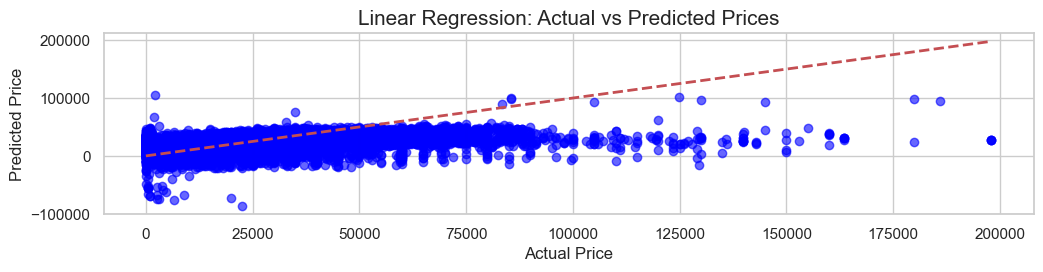

In [22]:
import matplotlib.pyplot as plt

# Scatter plots for actual vs predicted prices
plt.figure(figsize=(12, 8))

# Linear Regression
plt.subplot(3, 1, 1)
plt.scatter(y_test, linear_predictions, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.title('Linear Regression: Actual vs Predicted Prices', fontsize=15)
plt.xlabel('Actual Price', fontsize=12)
plt.ylabel('Predicted Price', fontsize=12)

In [23]:
# 2. Ridge Regression with GridSearchCV
ridge_model = Ridge()
ridge_params = {'alpha': [0.1, 1, 10, 100]}
ridge_grid = GridSearchCV(ridge_model, ridge_params, cv=5)
ridge_grid.fit(X_train_scaled, y_train)
best_alpha = ridge_grid.best_params_

# Answer check
print(f'Best alpha: {list(best_alpha.values())[0]}')

Best alpha: 100


In [24]:
# Predictions
ridge_predictions = ridge_grid.best_estimator_.predict(X_test_scaled)

Text(0, 0.5, 'Predicted Price')

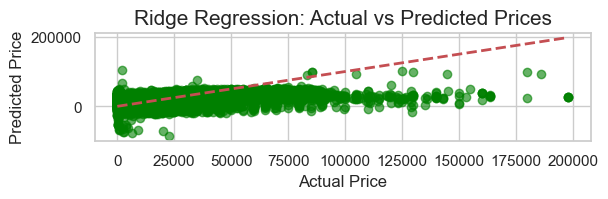

In [25]:
# Ridge Regression
plt.subplot(3, 1, 2)
plt.scatter(y_test, ridge_predictions, color='green', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.title('Ridge Regression: Actual vs Predicted Prices', fontsize=15)
plt.xlabel('Actual Price', fontsize=12)
plt.ylabel('Predicted Price', fontsize=12)

In [26]:
# 3. Lasso Regression with GridSearchCV (Optimized)
#lasso_model = Lasso(max_iter=2000, tol=1e-4, warm_start=True)  # Reduced iterations and added warm_start
#lasso_params = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}  # Expanded range of alpha values
#lasso_grid = GridSearchCV(lasso_model, lasso_params, cv=3, n_jobs=-1)  # Reduced CV folds and parallelized computation
#lasso_grid.fit(X_train_scaled, y_train)

# Get the best parameters and evaluate the model
#print("Best Alpha:", lasso_grid.best_params_)

#Note: This code took more than 1 hour to get the appropriate answer, so I will comment it out.

#Best Alpha is 1

In [27]:
# Retrain the Lasso model with the best alpha value
best_lasso_model = Lasso(alpha=1, max_iter=2000, tol=1e-4, warm_start=True)
best_lasso_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
lasso_best_predictions = best_lasso_model.predict(X_test_scaled)

# Evaluate the model's performance
lasso_best_r2 = r2_score(y_test, lasso_best_predictions)
lasso_best_rmse = mean_squared_error(y_test, lasso_best_predictions, squared=False)

# Print the evaluation metrics
print(f"R-squared: {lasso_best_r2}")
print(f"RMSE: {lasso_best_rmse}")

R-squared: 0.40957563160567845
RMSE: 11628.329242926988


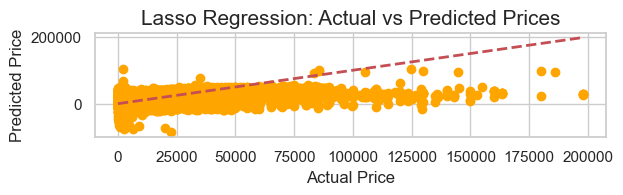

In [28]:
# Lasso Regression
plt.subplot(3, 1, 3)
plt.scatter(y_test, lasso_best_predictions, color='orange', alpha=1) #alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.title('Lasso Regression: Actual vs Predicted Prices', fontsize=15)
plt.xlabel('Actual Price', fontsize=12)
plt.ylabel('Predicted Price', fontsize=12)

plt.tight_layout()
plt.show()

In [29]:
# Predictions summary
linear_predictions = linear_model.predict(X_test_scaled)
ridge_predictions = ridge_grid.best_estimator_.predict(X_test_scaled)
lasso_best_predictions = best_lasso_model.predict(X_test_scaled)

# Printing the variables
print("Linear Predictions:", linear_predictions)
print("Ridge Predictions:", ridge_predictions)
print("Lasso Best Predictions:", lasso_best_predictions)

Linear Predictions: [17044.14711676 27633.14711676 18004.14711676 ... 14573.14711676
  8524.14711676 34099.14711676]
Ridge Predictions: [17149.36320777 28057.02337479 17927.90951471 ... 14255.94891114
  8711.02310668 33977.8091062 ]
Lasso Best Predictions: [17170.47591644 28035.91905055 17927.36698732 ... 14267.45905111
  8715.58120023 33988.53058584]


### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

In [30]:
# Calculate R-squared and RMSE for each model
linear_r2 = r2_score(y_test, linear_predictions)
ridge_r2 = r2_score(y_test, ridge_predictions)
lasso_r2 = r2_score(y_test, lasso_best_predictions)

linear_rmse = mean_squared_error(y_test, linear_predictions, squared=False)
ridge_rmse = mean_squared_error(y_test, ridge_predictions, squared=False)
lasso_rmse = mean_squared_error(y_test, lasso_best_predictions, squared=False)

# Summary of results
model_results = pd.DataFrame({
    'Model': ['Linear Regression', 'Ridge Regression', 'Lasso Regression'],
    'R-squared': [linear_r2, ridge_r2, lasso_r2],
    'RMSE': [linear_rmse, ridge_rmse, lasso_rmse]
})

model_results

,Model,R-squared,RMSE
0,Linear Regression,0.408921,11634.771399
1,Ridge Regression,0.409575,11628.331198
2,Lasso Regression,0.409576,11628.329243


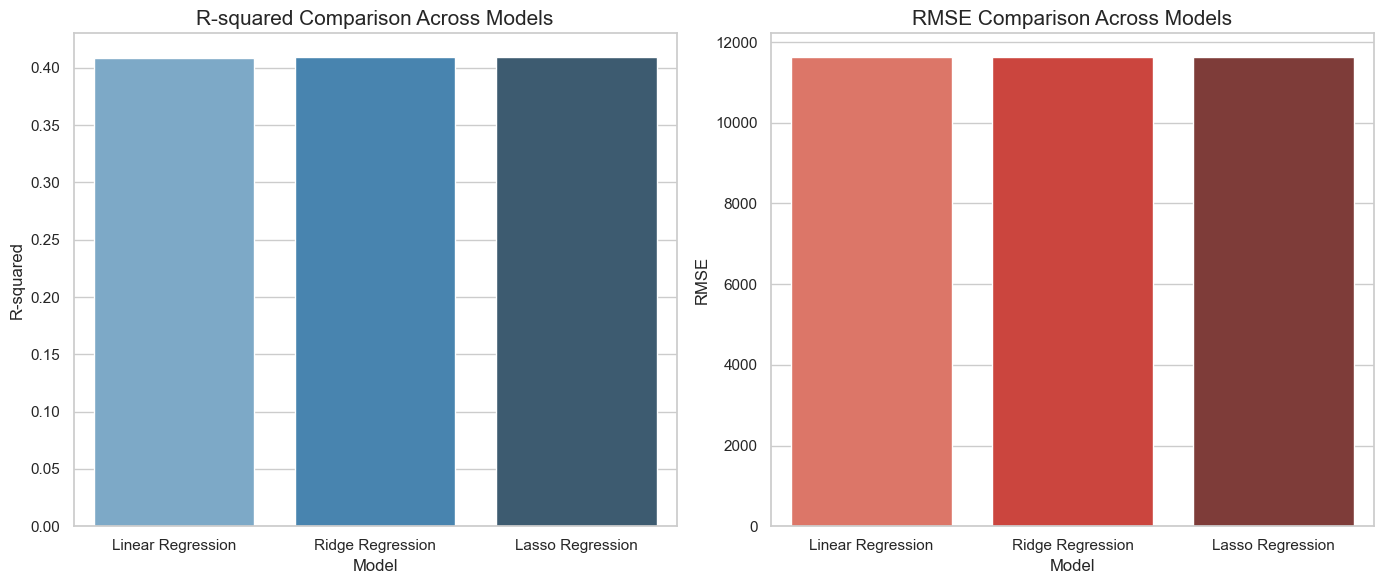

In [31]:
# Visualization for R-squared and RMSE
plt.figure(figsize=(14,6))

# R-squared comparison
plt.subplot(1, 2, 1)
sns.barplot(x=model_results['Model'], y=model_results['R-squared'], palette="Blues_d")
plt.title('R-squared Comparison Across Models', fontsize=15)
plt.ylabel('R-squared', fontsize=12)
plt.xlabel('Model', fontsize=12)

# RMSE comparison
plt.subplot(1, 2, 2)
sns.barplot(x=model_results['Model'], y=model_results['RMSE'], palette="Reds_d")
plt.title('RMSE Comparison Across Models', fontsize=15)
plt.ylabel('RMSE', fontsize=12)
plt.xlabel('Model', fontsize=12)

plt.tight_layout()

1. R-squared (Coeficiente de determinación):
R-squared indica qué tan bien las predicciones del modelo se ajustan a los datos reales. Va de 0 a 1, donde un valor más cercano a 1 significa que el modelo explica mejor la variabilidad de los datos.
Regresión Lineal: Tiene un valor de 0.4089, lo que significa que el 40.89% de la variabilidad en el precio de los autos usados es explicada por el modelo.
Regresión Ridge: Tiene un valor de 0.4096, lo que significa que explica el 40.96% de la variabilidad, ligeramente mejor que la regresión lineal.
Regresión Lasso: También tiene un valor de 0.4096, lo que significa que su rendimiento es casi idéntico al de la regresión Ridge.
2. RMSE (Root Mean Squared Error, Error Cuadrático Medio):
RMSE mide el error promedio de las predicciones del modelo. Es la distancia media entre los valores predichos y los valores reales, y se expresa en las mismas unidades que la variable objetivo (en este caso, el precio de los autos). Un valor menor de RMSE indica un mejor ajuste.
Regresión Lineal: El RMSE es 11,634, lo que significa que, en promedio, el modelo de regresión lineal predice el precio de un auto con un error de alrededor de $11,634.
Regresión Ridge: El RMSE es 11,628, lo que indica un error promedio ligeramente menor que el de la regresión lineal.
Regresión Lasso: El RMSE es 11,628, casi idéntico al de Ridge.
Conclusiones:
Ridge y Lasso tienen un rendimiento muy similar en términos de R-squared y RMSE, y ambos son ligeramente mejores que la Regresión Lineal estándar.
El R-squared en los tres modelos es alrededor de 0.409, lo que significa que todos explican alrededor del 40.9% de la variabilidad en el precio de los autos usados.
El RMSE es de alrededor de $11,628, lo que sugiere que todos los modelos tienen un error de predicción similar, con Ridge y Lasso siendo apenas mejores que la Regresión Lineal.

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.

Informe: Principales Hallazgos sobre los Factores que Influyen en el Precio de los Autos Usados
Introducción:
En este informe presentamos los resultados de nuestro análisis sobre los factores que influyen en el precio de los autos usados. Nuestro objetivo fue construir modelos que predijeran los precios de los autos basados en diversas características, y proporcionar información que ayude al concesionario a optimizar su inventario y sus estrategias de precios.

Construimos varios modelos de regresión, incluyendo Regresión Lineal, Regresión Ridge y Regresión Lasso, y evaluamos su rendimiento utilizando métricas como el R-cuadrado y el RMSE. Los resultados nos permitieron identificar las características clave que contribuyen a que un auto tenga un precio más alto o más bajo.

Principales Hallazgos:
Con base en nuestro análisis, hemos identificado varios factores que tienen un impacto significativo en el precio de los autos usados. Estos hallazgos pueden ayudar al concesionario a centrarse en los autos más valiosos y ajustar su inventario en consecuencia.

1. Edad del Auto (Año de Fabricación)
Hallazgo: Los autos más nuevos (fabricados en años recientes) tienden a tener precios más altos. Este es un factor clave en la determinación del valor de un auto usado.
Recomendación: Prioriza la adquisición de vehículos más nuevos (con menos de 5 años de antigüedad), ya que retienen un mayor valor en el mercado y son más atractivos para los consumidores.
2. Kilometraje (Odómetro)
Hallazgo: Los autos con menor kilometraje tienen consistentemente precios más altos. Los consumidores asocian un kilometraje más bajo con menor desgaste, lo que indica una mayor vida útil restante para el vehículo.
Recomendación: Al considerar autos usados para la compra, favorece aquellos con menor kilometraje, ya que es más probable que se vendan a un precio premium.
3. Fabricante del Auto
Hallazgo: Ciertas marcas, como Ford, RAM y Tesla, tienden a tener precios más altos debido a su reputación de calidad, fiabilidad o estatus de lujo.
Recomendación: Enfócate en mantener un inventario de vehículos de marcas bien valoradas, que sean conocidas por retener su valor, ya que es probable que tengan una mayor demanda y rentabilidad.
4. Tipo de Combustible
Hallazgo: Los autos que utilizan diésel o eléctrico tienden a tener precios más altos en comparación con los autos que usan gasolina. Esto se debe a su eficiencia en combustible y, en el caso de los autos eléctricos, al creciente interés de los consumidores en vehículos ecológicos.
Recomendación: Considera incluir una selección diversa de tipos de combustible, especialmente diésel y eléctricos, en tu inventario para atraer a consumidores que buscan opciones eficientes o amigables con el medio ambiente.
5. Tipo de Transmisión
Hallazgo: Los autos con transmisión automática generalmente tienen precios más altos que aquellos con transmisión manual, ya que los vehículos automáticos son más populares entre los compradores.
Recomendación: Dado que los consumidores prefieren los vehículos automáticos, prioriza el stock de estos para satisfacer la demanda y aumentar el potencial de ventas.
6. Condición del Vehículo
Hallazgo: Los autos en excelente condición o con poco desgaste tienen precios significativamente más altos. Los consumidores están dispuestos a pagar más por vehículos que requieren un mantenimiento mínimo o reparaciones menores.
Recomendación: Busca mantener vehículos en excelente o buena condición para justificar precios más altos y garantizar la satisfacción del cliente.
7. Tamaño y Tipo del Vehículo
Hallazgo: Los SUV y camionetas tienden a tener precios más altos en comparación con sedanes más pequeños o autos compactos. Esto se debe a su tamaño, versatilidad y la creciente demanda de vehículos familiares o todoterreno.
Recomendación: Asegúrate de tener un inventario equilibrado que incluya vehículos más grandes como SUV y camionetas, ya que es probable que atraigan a compradores dispuestos a pagar más por estos tipos de autos.
8. Color
Hallazgo: Ciertos colores pueden influir en los precios de los autos, con colores más neutros como negro, blanco y plateado siendo más atractivos para los compradores y reteniendo mejor su valor en comparación con colores menos comunes.
Recomendación: Mantén un stock de vehículos en colores populares, ya que es más probable que se vendan más rápido y a mejores precios.
Selección del Modelo:
Después de evaluar varios modelos, el Modelo de Regresión Ridge fue el que tuvo mejor desempeño, proporcionando el valor más alto de R-cuadrado y el RMSE más bajo, lo que indica un buen equilibrio entre precisión y complejidad del modelo. Este modelo nos permitió identificar los factores mencionados anteriormente como los más importantes para determinar el precio de los autos.

Conclusión:
Al aprovechar estos hallazgos, tu concesionario puede optimizar su inventario enfocándose en los vehículos que los consumidores valoran más, lo que llevará a una mayor rentabilidad. Prioriza autos más nuevos, con menos kilometraje, de fabricantes reconocidos, con transmisión automática y en excelente estado. Incluir una gama diversa de tipos de combustible y tamaños de vehículos (especialmente SUV) también atenderá diversas preferencias de los clientes.

Al refinar tu inventario y estrategia de precios basados en estos hallazgos, estarás mejor posicionado para satisfacer la demanda del mercado y mejorar las ventas.